In [1]:
import os
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dense , Flatten , Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

Found 998 files belonging to 2 classes.


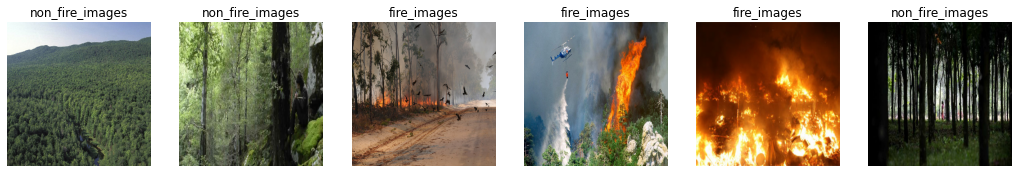

In [2]:
train_pic = image_dataset_from_directory("/content/drive/MyDrive/Fire Detection/fire_dataset",seed=8)
labels = train_pic.class_names
plt.figure(figsize=(18,18))
for img, label in train_pic.take(1):
  for i in range(6):
    ax = plt.subplot(1,6, i + 1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(labels[label[i]])
    plt.axis("off")

In [3]:
fire_path = glob.glob(os.path.join("/content/drive/MyDrive/Fire Detection/fire_dataset/fire_images/*"))
nonfire_path = glob.glob(os.path.join("/content/drive/MyDrive/Fire Detection/fire_dataset/non_fire_images/*"))
X=[]
Y=[]
for img in fire_path:
    image = cv2.imread(img)
    image = cv2.resize(image,(224,224))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image / 255.0
    X.append(image)
    Y.append(1)
for img in nonfire_path:
    image = cv2.imread(img)
    image = cv2.resize(image,(224,224))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image / 255.0
    X.append(image)
    Y.append(0)

In [4]:
X = np.array(X)
Y = np.array(Y)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

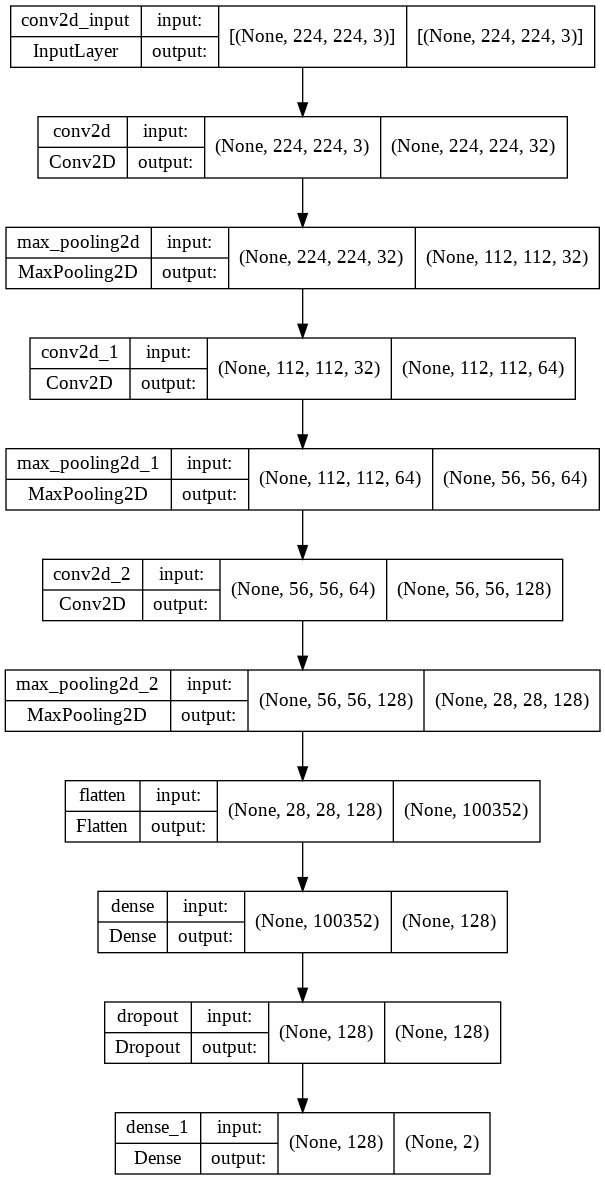

In [7]:
plot_model(model,show_shapes=True)

In [8]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("FireDetection_model.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [9]:
history = model.fit(X_train,Y_train,epochs=25,validation_data=(X_test,Y_test),batch_size=30,callbacks=[checkpoint])

Epoch 1/25
27/27 [==============================] - 92s 3s/step - loss: 0.5072 - accuracy: 0.8083 - val_loss: 0.2740 - val_accuracy: 0.8850
Epoch 2/25
27/27 [==============================] - 89s 3s/step - loss: 0.1735 - accuracy: 0.9261 - val_loss: 0.0975 - val_accuracy: 0.9500
Epoch 3/25
27/27 [==============================] - 89s 3s/step - loss: 0.1071 - accuracy: 0.9536 - val_loss: 0.1426 - val_accuracy: 0.9500
Epoch 4/25
27/27 [==============================] - 89s 3s/step - loss: 0.1217 - accuracy: 0.9536 - val_loss: 0.0751 - val_accuracy: 0.9750
Epoch 5/25
27/27 [==============================] - 89s 3s/step - loss: 0.1086 - accuracy: 0.9486 - val_loss: 0.0894 - val_accuracy: 0.9750
Epoch 6/25
27/27 [==============================] - 89s 3s/step - loss: 0.0847 - accuracy: 0.9749 - val_loss: 0.0657 - val_accuracy: 0.9850
Epoch 7/25
27/27 [==============================] - 91s 3s/step - loss: 0.0821 - accuracy: 0.9687 - val_loss: 0.2135 - val_accuracy: 0.8950
Epoch 8/25
27/27 [==

In [10]:
print("Accuracy: ",max(history.history["val_accuracy"]))

Accuracy:  0.9850000143051147


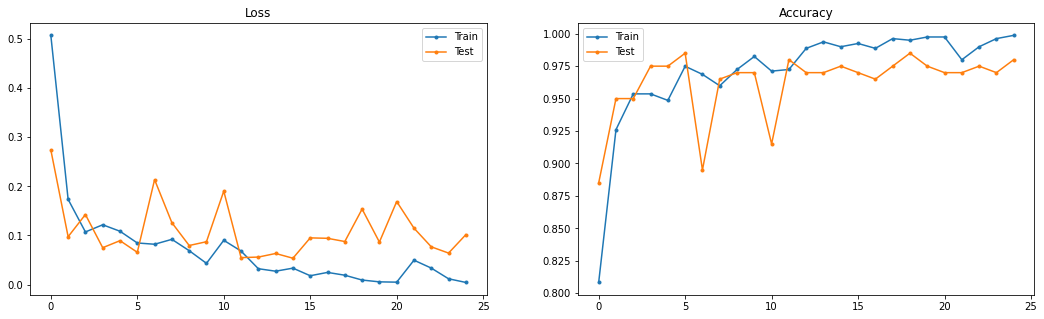

In [11]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()